# Exploratory Notebook — Retail Sales Forecast

Este notebook mostra o fluxo básico:
1. Carregamento dos dados
2. Engenharia de feature (mês numérico)
3. Treino da regressão linear
4. Previsão para Dezembro
5. Geração dos gráficos

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Dados

In [2]:
dados_vendas = {
    "mes": [
        "Janeiro","Fevereiro","Março","Abril","Maio","Junho",
        "Julho","Agosto","Setembro","Outubro","Novembro","Dezembro"
    ],
    "vendas": [2000,2200,2300,2500,2600,2700,2800,2900,3000,3100,3200,3300],
}

df = pd.DataFrame(dados_vendas)
df

,mes,vendas
0,Janeiro,2000
1,Fevereiro,2200
2,Março,2300
3,Abril,2500
4,Maio,2600
5,Junho,2700
6,Julho,2800
7,Agosto,2900
8,Setembro,3000
9,Outubro,3100


## Engenharia de feature

In [3]:
meses = {
    "Janeiro": 1, "Fevereiro": 2, "Março": 3, "Abril": 4,
    "Maio": 5, "Junho": 6, "Julho": 7, "Agosto": 8,
    "Setembro": 9, "Outubro": 10, "Novembro": 11, "Dezembro": 12,
}
df["mes_num"] = df["mes"].map(meses)
df

,mes,vendas,mes_num
0,Janeiro,2000,1
1,Fevereiro,2200,2
2,Março,2300,3
3,Abril,2500,4
4,Maio,2600,5
5,Junho,2700,6
6,Julho,2800,7
7,Agosto,2900,8
8,Setembro,3000,9
9,Outubro,3100,10


## Treino e previsão

In [5]:
train = df[df["mes_num"] <= 11]
X = train[["mes_num"]].values
y = train["vendas"].values

model = LinearRegression()
model.fit(X, y)

# Previsão para Dezembro
dec_forecast = model.predict([[12]])[0]
print(f"Previsão de vendas para Dezembro: R$ {dec_forecast:.2f}")

Previsão de vendas para Dezembro: R$ 3356.36


## Visualizações

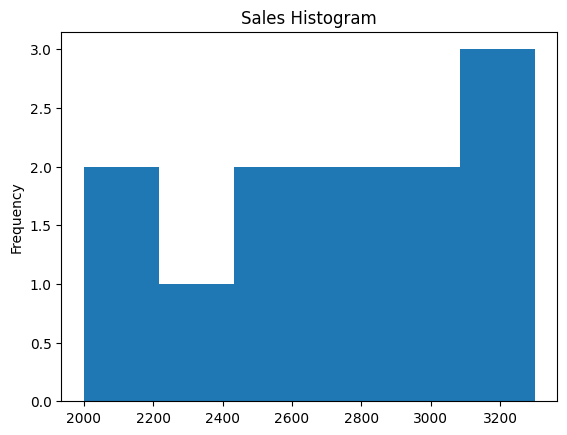

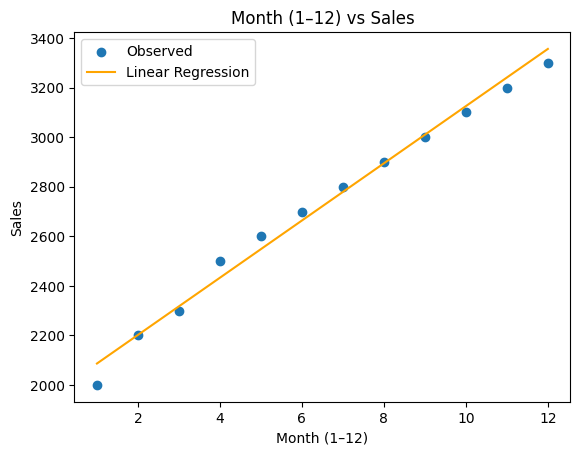

In [7]:
# Histograma
df["vendas"].plot(kind="hist", bins=6, title="Sales Histogram")

# Scatter com reta de regressão
plt.figure()
plt.scatter(df["mes_num"], df["vendas"], label="Observed")
x_line = np.arange(1, 13).reshape(-1, 1)
y_line = model.predict(x_line)
plt.plot(x_line, y_line, label="Linear Regression", color="orange")
plt.title("Month (1–12) vs Sales")
plt.xlabel("Month (1–12)")
plt.ylabel("Sales")
plt.legend()
plt.show()